# KNN 
## Predict whether a email is a Spam or Not

In [37]:
# import necerssary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [38]:
#Data_set=pd.read_csv("Spam.xls")

with open("spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
Data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam']) 
# spam = spamData.pop('spam')

Data_array=Data_set.values
# print(Data_array)
Data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [39]:
print("Number of rows before preprocessing : ", len(Data_set))

Number of rows before preprocessing :  4601


 Finding the duplicates in the dataset

In [40]:
Data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

Dropping the duplicate values

In [41]:
Data_set.drop_duplicates(inplace=True)

In [42]:
print("Number of rows in after removing duplicates : ", len(Data_set))

Number of rows in after removing duplicates :  4210


Finding the null values in the dataset

In [43]:
Data_set.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Removing the target column 

In [44]:
data=Data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [45]:
print("Number of rows after preprocessing : ", len(Data_set))

Number of rows after preprocessing :  4210


Summary of dataset before performing Standard Scaler

In [46]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Performing Standard Scaling for the dataset

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630


Summmary of dataset after performing Standard Scaling

In [48]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,...,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,-3.480997e-15,-2.548357e-15,3.381328e-15,-2.009289e-15,-7.919384e-15,1.947347e-15,-2.535291e-15,-3.765370e-15,-4.663622e-15,2.867804e-15,...,-3.655752e-15,-3.854122e-15,-1.138071e-15,6.488607e-17,-1.913895e-15,4.962433e-15,-1.364928e-15,2.236631e-16,-7.356480e-16,-1.421138e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-4.664436e-02,1.231299e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-8.897950e-02,...,-1.164071e-01,-1.600104e-01,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,3.160992e+01,1.406769e+01,2.095434e+01,1.800571e+01,2.681886e+01,1.831957e+01,2.731139e+01,...,3.338604e+01,1.720613e+01,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


Performing PCA to the Dataset

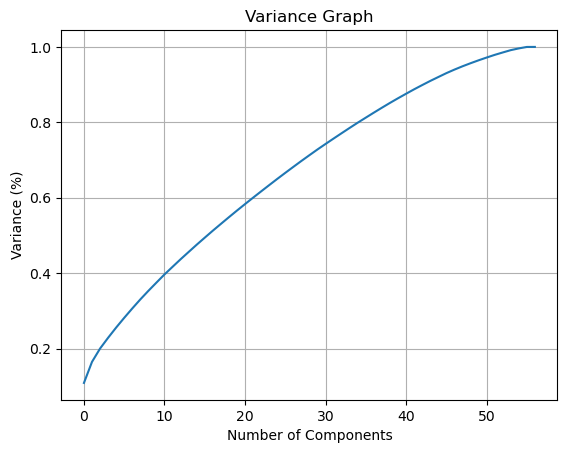

In [49]:
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Variance Graph')
plt.grid(True)
plt.show()

Introducing the PCA components

In [50]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                          'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                          'PC41','PC42','PC43','PC44'])

Dataset after performing PCA

In [51]:
principal_Df.head()
# principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766905,0.049622,-0.643977,0.037287,-0.254683,-0.329078,-0.084586,0.350407,1.751494,0.181572,...,0.356816,-0.276478,0.295077,0.146170,0.253536,0.067398,0.215696,0.222151,-0.405314,0.233960
1,-1.293575,2.007036,0.071358,-0.481659,-0.100125,-1.116919,-0.544768,0.250854,-0.308725,-0.630450,...,-0.265576,-0.162701,-0.456400,-0.181332,0.127785,0.073992,0.241481,0.562179,0.003679,0.309973
2,-1.612744,4.821253,3.137310,-1.073049,1.592633,-1.500611,-3.175148,-1.399189,1.030740,2.520523,...,2.084584,-0.047456,-0.750323,-0.349277,-0.302949,0.962318,0.803470,0.558033,0.323268,-0.747104
3,-0.857216,0.414163,-0.551300,-0.031313,-0.049682,0.703058,0.339522,-0.445423,-0.366475,0.183457,...,0.342155,-0.059631,0.050147,0.252980,-0.309003,0.484126,0.812607,-0.608374,0.346821,-0.303963
4,-0.858070,0.413496,-0.553425,-0.031573,-0.049713,0.703674,0.337778,-0.446704,-0.366813,0.183054,...,0.341476,-0.059524,0.051814,0.253550,-0.309012,0.484565,0.811784,-0.607006,0.346663,-0.302977


In [52]:
print(pca.explained_variance_)


[6.21425733 3.18296901 2.01337295 1.62941113 1.54593571 1.46864267
 1.4159303  1.36728219 1.29484356 1.24508712 1.23603493 1.1493153
 1.14404928 1.10352441 1.09709142 1.06430947 1.05387868 1.02431975
 1.01639149 1.00112247 0.97906508 0.96808091 0.95323709 0.94494418
 0.93798408 0.91809613 0.90394456 0.89564218 0.87375744 0.86521223
 0.83040987 0.81859398 0.81016708 0.80212381 0.78850438 0.76004786
 0.75784347 0.74155386 0.7264307  0.70259832 0.68111219 0.67098071
 0.6385953  0.62605036]


In [53]:
print(pca.components_)

[[-0.04690803 -0.02057998 -0.05221265 ... -0.02020216 -0.03395573
  -0.04960888]
 [ 0.14443518  0.1118871   0.14576684 ...  0.13599183  0.23902349
   0.20847347]
 [-0.03011912 -0.02133952 -0.03047614 ...  0.30345589  0.46504183
   0.38997543]
 ...
 [-0.14658661  0.21332027 -0.00766042 ... -0.09405492  0.04932201
   0.48143404]
 [ 0.11837249  0.13373966  0.06832781 ... -0.09799644  0.03366189
   0.07870259]
 [ 0.12720294 -0.26360195  0.00935796 ... -0.16081148 -0.01795574
   0.37436248]]


Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [54]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Perform 10-fold cross validation

In [56]:
# from sklearn.model_selection import cross_val_score                         # Use cross_val_score function
# from sklearn.neighbors import KNeighborsClassifier
# import warnings
# warnings.filterwarnings('ignore')

# knn = KNeighborsClassifier(n_neighbors = 5)
# knn.fit(X_train,y_train)

# neighbors = []                                                              # Empty list to store neighbors
# cv_scores = []                                                              # Empty list to store scores
  
# # Perform 10-fold cross validation with K=5 for KNN (the n_neighbors parameter)

# for k in range(1, 51, 2):                                                   # Range of K we want to try
#     neighbors.append(k) 
#     knn = KNeighborsClassifier(n_neighbors = k)                             # k = 5 for KNeighborsClassifier
#     scores = cross_val_score( 
#         knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
#     cv_scores.append(scores.mean()) 
    
# # Passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# # cv=10 for 10 folds
# # Scoring='accuracy' for evaluation metric    
    
# scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
# print(scores)   

Find optimal K value

In [57]:
# # Finding the misclassification error versus k
# MSE = [1-x for x in cv_scores]                                             

# # Finding the best k value
# optimal_k = neighbors[MSE.index(min(MSE))]
# print('Optimal no. of K neighbors = %d ' %optimal_k)

# # Plotting the misclassification error versus k
# plt.figure(figsize = (15,6))
# plt.plot(neighbors, MSE)
# plt.xlabel('Number of K neighbors')
# plt.ylabel('Misclassification Error')
# plt.show()

In [58]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [59]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[460,  35],
       [ 51, 296]], dtype=int64)

In [62]:
# Generate summary of the prediction (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print('Classification Report : \n\n')
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.90      0.93      0.91       495
           1       0.89      0.85      0.87       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.89       842
weighted avg       0.90      0.90      0.90       842



In [63]:
# Accuracy score of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy score of email prediction using KNN : ",accuracy_score(y_pred,y_test)*100) 

Accuracy score of email prediction using KNN :  89.78622327790974


Visualization

Text(113.9222222222222, 0.5, 'predicted class')

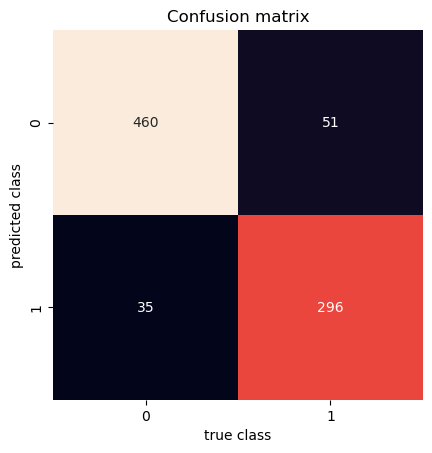

In [66]:
# based on test values generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')


Decision Tree Classifier

In [29]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

Splitting the dataset into the Training set and Test set

In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

Apply Decision Tree Classifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier
spamTree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
spamTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [32]:
spamTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [33]:
predTree = spamTree.predict(X_test)

In [34]:
print (predTree [0:5])
print (y_test [0:5])


[0 1 0 0 0]
[1 1 0 0 0]


In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8752969121140143
